In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np
from inference.walker_inference import BiasedPersistentInferer

ModuleNotFoundError: No module named 'sources'

In [2]:
filename = '/Users/danieltudor/Documents/ImmuneCellMigrationAnalysis/data/ImageJcsvs/Control_1_new.csv'
dataframe = pd.read_csv(filename,header=0)

In [3]:
# preview the structure of the data
dataframe[:5]

,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MANUAL_COLOR,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR
0,ID1013,1013,0,0.957,181.586,88.908,0,0,0,7.5,...,-10921639,39.199,17,3,255,16189,46.307,4.659,0.134,0.200
1,ID865,865,0,1.748,180.592,89.811,0,30,1,7.5,...,-10921639,53.107,24,4,255,21933,58.465,7.241,0.346,0.467
2,ID940,940,0,2.213,180.349,91.675,0,60,2,7.5,...,-10921639,60.823,25,3,255,25120,70.779,7.103,0.386,0.479
3,ID500,500,0,2.325,179.918,93.531,0,90,3,7.5,...,-10921639,65.719,22,4,255,27142,76.285,7.482,0.359,0.455
4,ID1105,1105,0,2.638,181.468,92.119,0,120,4,7.5,...,-10921639,77.312,40,5,255,31930,81.088,7.849,0.397,0.542


In [6]:
# extract the track IDs
trackIDs = np.unique(dataframe['TRACK_ID'])
num_tracks = len(trackIDs)
num_timepoints = len(np.unique(dataframe['POSITION_T'].values))
num_tracks, num_timepoints

(431, 120)

In [7]:
reshapeddata = pd.DataFrame({'trackID':dataframe['TRACK_ID'],
                             'time':dataframe['POSITION_T'],
                             'x':dataframe['POSITION_X'],
                             'y':dataframe['POSITION_Y']})

In [8]:
reshapeddata

,trackID,time,x,y
0,0,0,181.586,88.908
1,0,30,180.592,89.811
2,0,60,180.349,91.675
3,0,90,179.918,93.531
4,0,120,181.468,92.119
...,...,...,...,...
9633,429,3510,284.044,173.375
9634,429,3540,285.972,177.089
9635,430,3420,353.555,26.984
9636,430,3450,353.555,24.216


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
from inference.walker_inference import BiasedPersistentInferer, prepare_paths
from in_silico.sources import PointSource

<IPython.core.display.Javascript object>


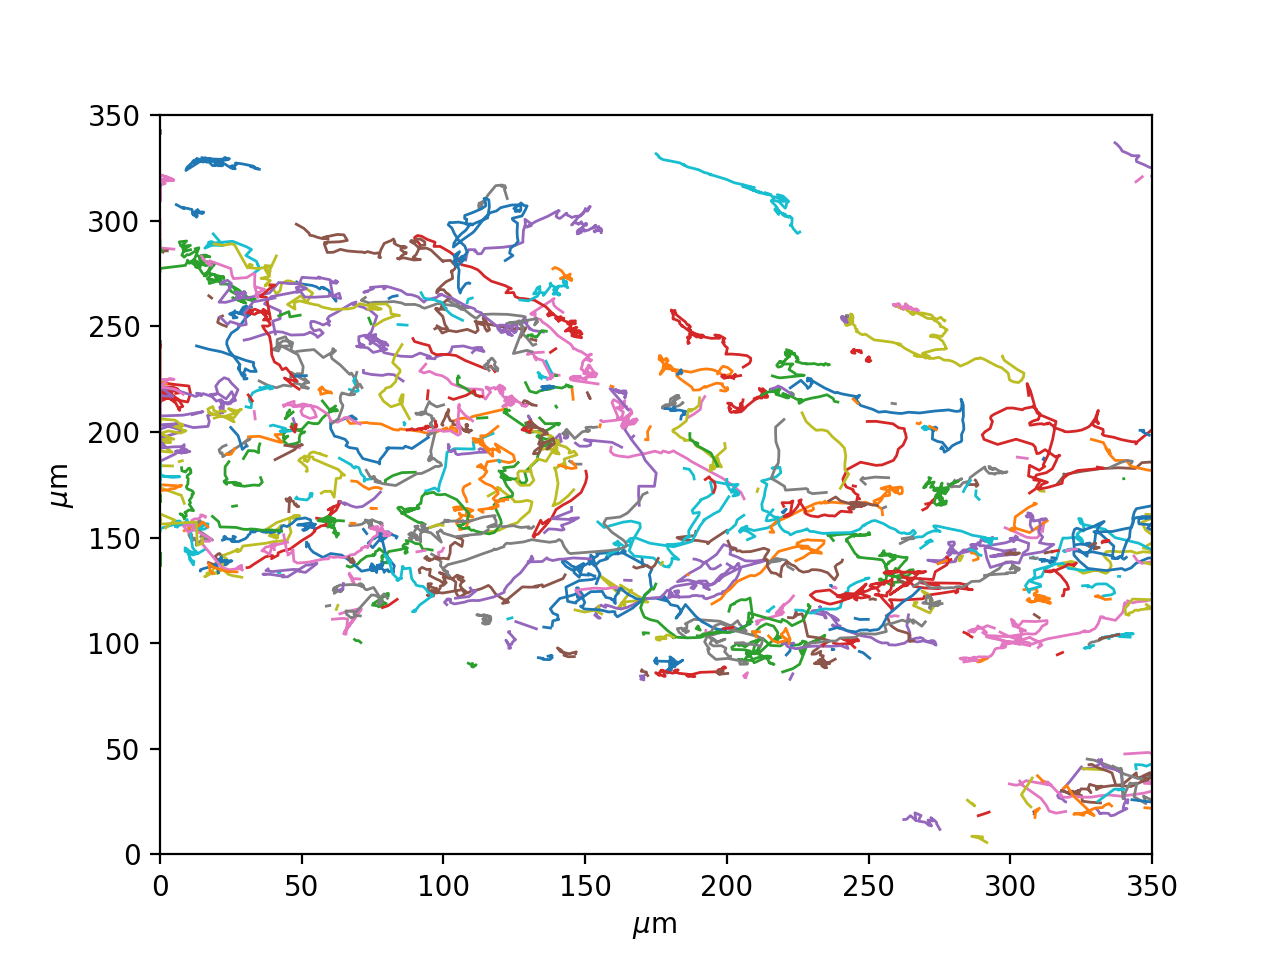

In [17]:
fig1 = plt.figure()
for ID, tracks in reshapeddata.groupby('trackID'):
        plt.plot(tracks['x'], tracks['y'], lw=1)
plt.xlim(0,350)
plt.ylim(0,350)
plt.xlabel('$\mu$m ')
plt.ylabel('$\mu$m ')
plt.savefig('/Users/danieltudor/Desktop/Tracks.pdf')

In [13]:
inf = BiasedPersistentInferer(prepare_paths([paths[['x', 'y']].values for id, paths in reshapeddata.groupby('trackID')], include_t=False), PointSource((300, 300)))

out = inf.multi_infer(n_walkers=10, n_steps=20000, burn_in=10000)

Beginning MCMC walk in parallel


  0%|          | 8/30000 [00:00<57:35,  8.68it/s]]/Users/danieltudor/Documents/ImmuneCellMigrationAnalysis/inference/base_inference.py:80: RuntimeWarning: overflow encountered in exp
  prob = np.exp(L_p - L0)
Total acceptance Rate: 0.367. Rolling acceptance rate: 0.365:   1%|          | 270/30000 [00:24<26:24, 18.77it/s]

Total acceptance Rate: 0.367. Rolling acceptance rate: 0.365:   1%|          | 273/30000 [00:24<30:25, 16.29it/s]

Total acceptance Rate: 0.342. Rolling acceptance rate: 0.340:   1%|          | 289/30000 [00:25<40:13, 12.31it/s]

Total acceptance Rate: 0.276. Rolling acceptance rate: 0.275:   1%|          | 362/30000 [00:25<24:09, 20.45it/s]

Total acceptance Rate: 0.387. Rolling acceptance rate: 0.385:   1%|          | 297/30000 [00:26<25:33, 19.37it/s]

Total acceptance Rate: 0.342. Rolling acceptance rate: 0.340:   1%|          | 356/30000 [00:29<27:22, 18.05it/s]

Total acceptance Rate: 0.387. Rolling acceptance rate: 0.385:   1%|▏         | 379/30000 [00:30<27:16, 18.10it/s]

Total acceptance Rate: 0.342. Rolling acceptance rate: 0.340:   1%|▏         | 383/30000 [00:31<44:04, 11.20it/s]

Total acceptance Rate: 0.342. Rolling acceptance rate: 0.340:   1%|▏         | 391/30000 [00:31<43:25, 11.36it/s]

Total acceptance Rate: 0.163. Rolling acceptance rate: 0.010:   1%|▏         | 443/30000 [00:33<40:49, 12.07it/s]s]

Total acceptance Rate: 0.170. Rolling acceptance rate: 0.000:   1%|▏         | 428/30000 [00:34<46:03, 10.70it/s]  Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
Traceback (most recent call last):
  File "/Users/danieltudor/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()


KeyboardInterrupt: 